In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [60]:
path = "D:\IITH\EE\EE6310-ImageVideoProcessing\Project\ConvLSTM_outputs\MNIST Outputs/"
all_files = os.listdir(path)

In [61]:
all_files

['output_1.npy', 'output_2.npy', 'tgt_1.npy', 'tgt_2.npy']

TypeError: 'int' object is not callable

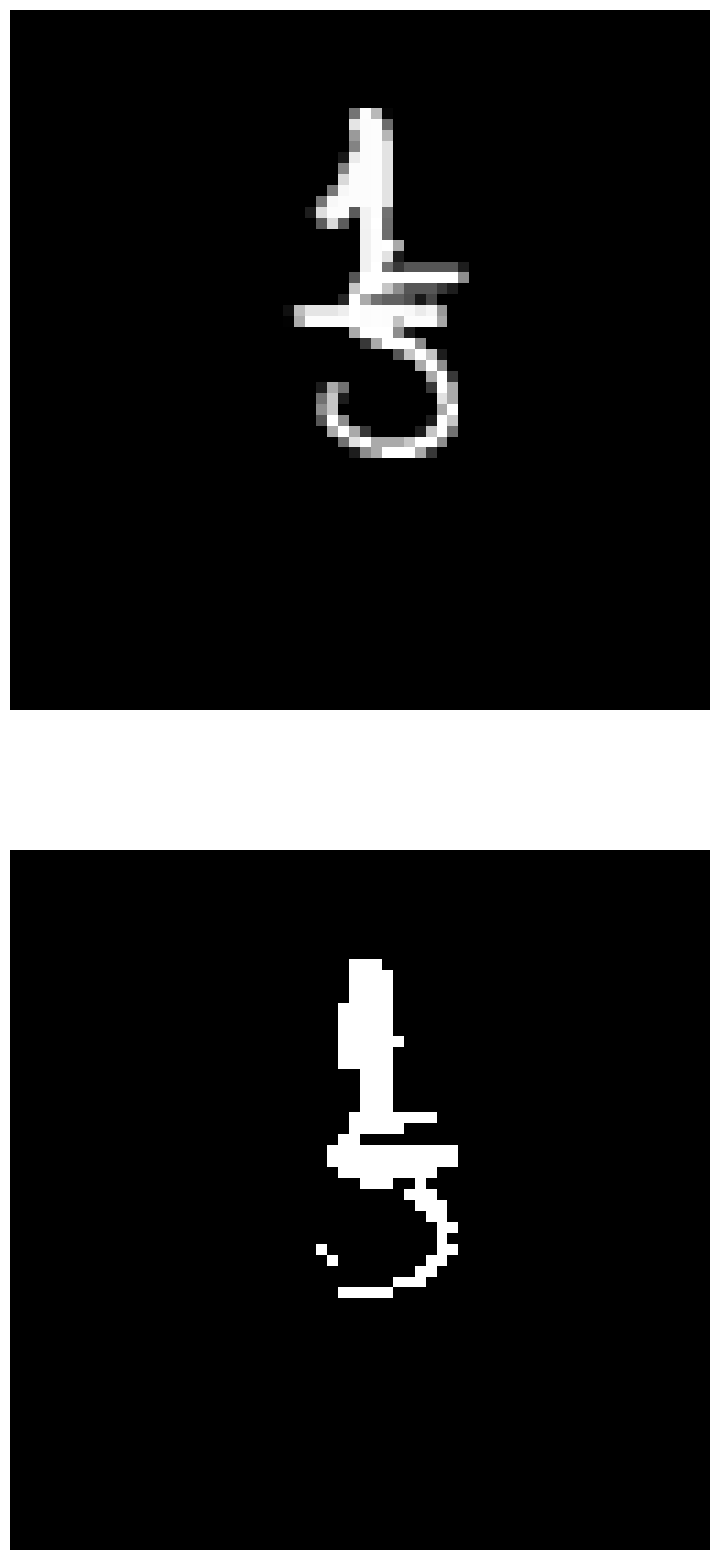

In [77]:
# target, output = [all_files[2], all_files[3]], [all_files[0], all_files[1]]
# for tgt, out in zip(target, output):
#     fig = plt.figure(figsize = (12, 30))
#     tgt_img, out_img = np.load(path+'/'+tgt), np.load(path+'/'+out)
#     cnt = 1
#     for i in range(tgt_img.shape[0]):
#         plt.subplot(tgt_img.shape[0], 2, cnt)
#         plt.imshow(tgt_img[i], cmap = 'gray')
#         plt.title("Target")
#         cnt += 1
#         plt.subplot(tgt_img.shape[0], 2, cnt)
#         plt.imshow(out_img[i], cmap = 'gray')
#         plt.title("Output")
#         cnt += 1
#     fig.tight_layout()
#     plt.show()
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

target, output = [all_files[2], all_files[3]], [all_files[0], all_files[1]]
# target = [all_files[5]]
# output = [all_files[0]]

for tgt, out in zip(target, output):
    fig = plt.figure(figsize = (120, 20))
    tgt_img, out_img = np.load(path+tgt), np.load(path+out)
    
    mse = 0
    ssim = 0

    cnt = 1
    endIndex = tgt_img.shape[0]
    for i in range(endIndex):
        plt.subplot(2, endIndex, cnt)
        plt.imshow(tgt_img[i], cmap = 'gray')
#         plt.title("Target")
        plt.axis('off')
        plt.subplot(2, endIndex, endIndex+cnt)
        plt.imshow(out_img[i], cmap = 'gray')
        plt.axis('off')
#         plt.title("Output")
        mse_tmp = mean_squared_error(tgt_img[i,:,:], out_img[i,:,:])
        ssim_tmp = ssim(tgt_img[i,:,:], out_img[i,:,:], data_range=np.max(out_img[i,:,:].flatten()) - np.min(out_img[i,:,:].flatten()))
        mse += mse_tmp
        ssim += ssim_tmp
        cnt += 1
    mse /= endIndex
    ssim /= endIndex
    print("MSE:", mse)
    print("SSIM:",ssim)
    fig.tight_layout()
    plt.show()

In [79]:
path = "D:\IITH\EE\EE6310-ImageVideoProcessing\Project\ConvLSTM_outputs\Walking Outputs/"
all_files = os.listdir(path)

In [80]:
all_files

['output_1.npy',
 'output_2.npy',
 'output_3.npy',
 'output_4.npy',
 'output_5.npy',
 'tgt_1.npy',
 'tgt_2.npy',
 'tgt_3.npy',
 'tgt_4.npy',
 'tgt_5.npy']

MSE: 299.277244004718
SSIM: 0.0


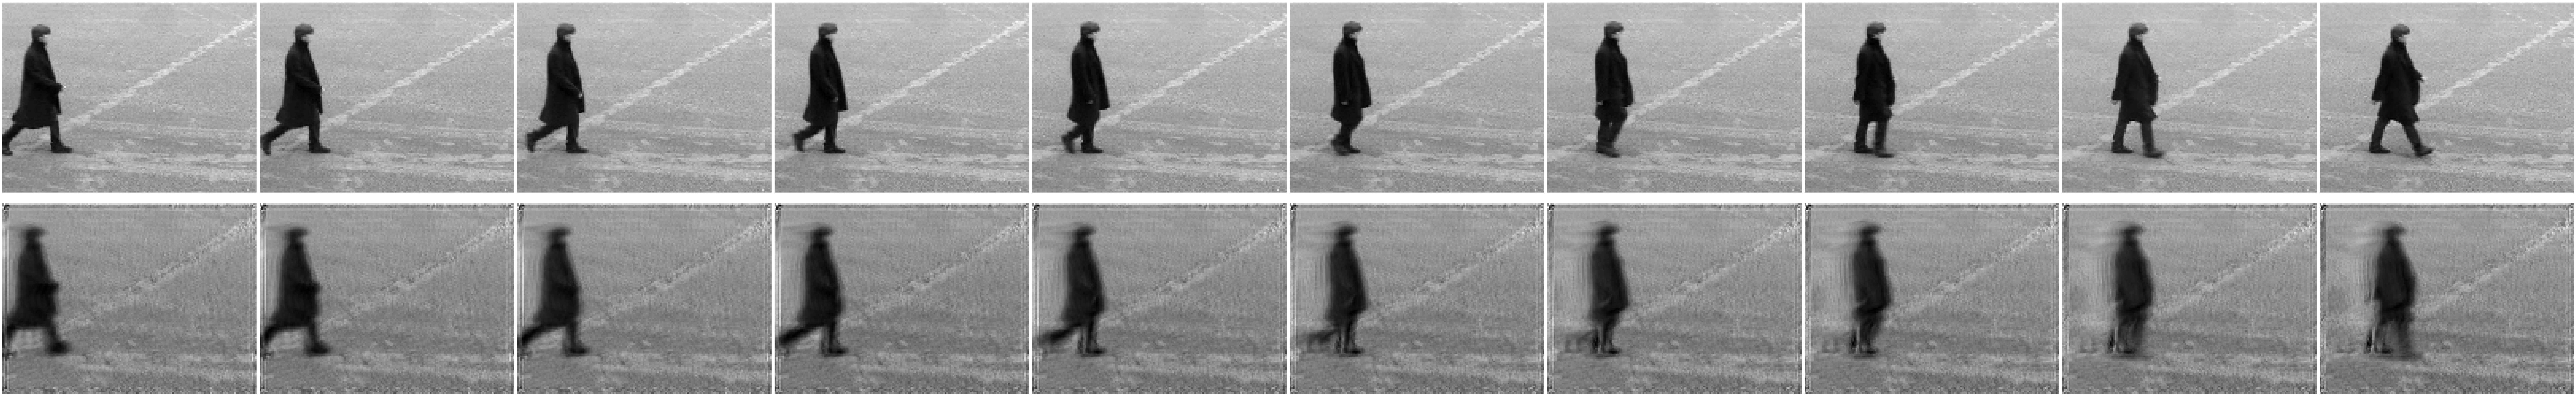

MSE: 235.83315821506122
SSIM: 0.0


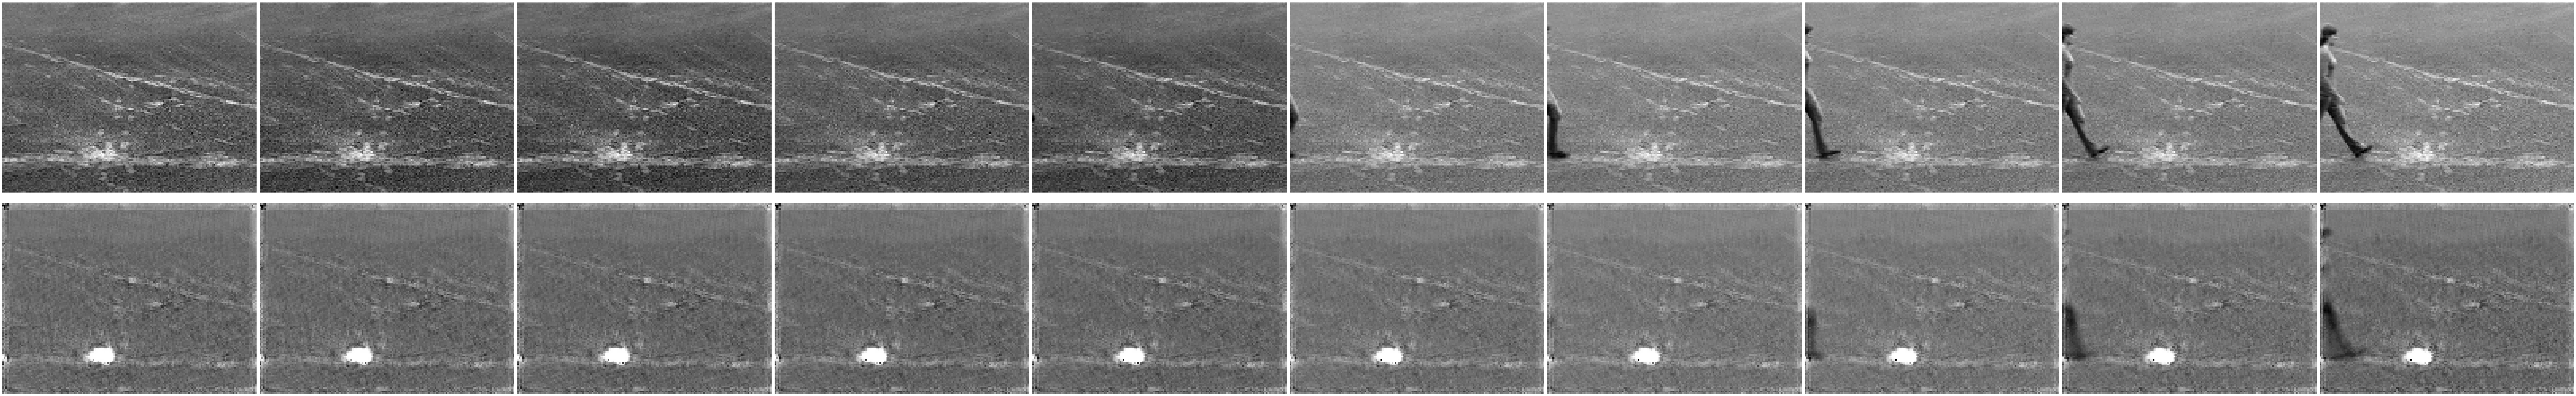

MSE: 205.6157305701119
SSIM: 0.0


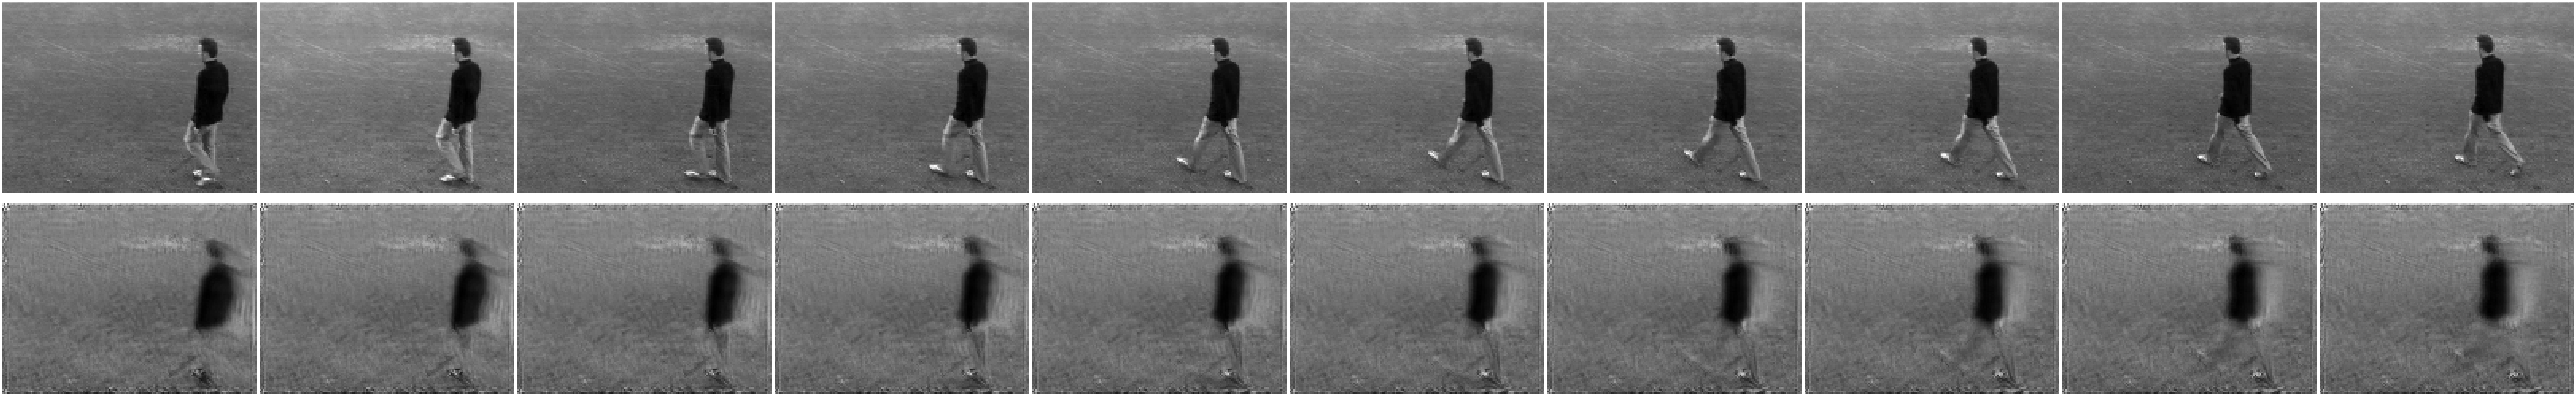

MSE: 477.60162512793534
SSIM: 0.0


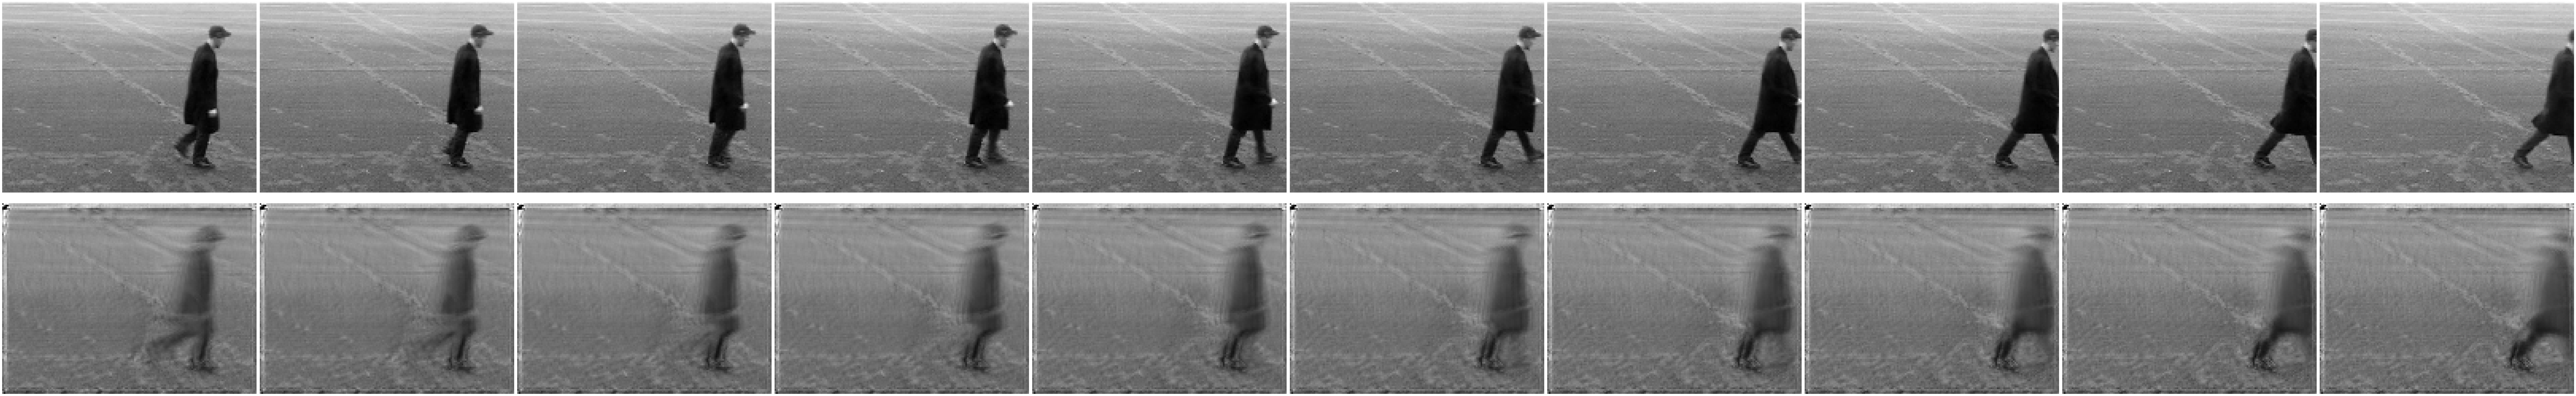

MSE: 302.0737050880913
SSIM: 0.0


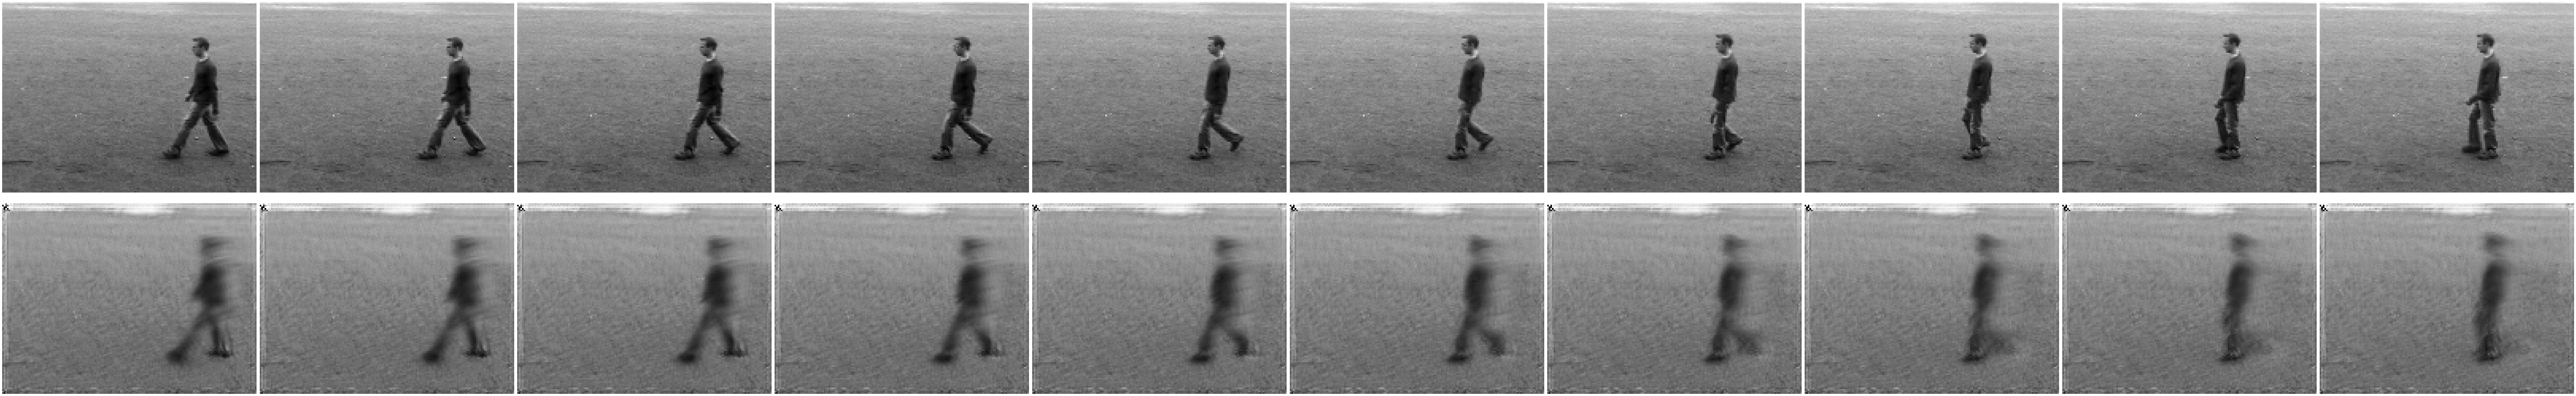

In [85]:
target = [all_files[5], all_files[6], all_files[7], all_files[8], all_files[9]]
output = [all_files[0], all_files[1], all_files[2], all_files[3], all_files[4]]
# target = [all_files[5]]
# output = [all_files[0]]

for tgt, out in zip(target, output):
    fig = plt.figure(figsize = (120, 20))
    tgt_img, out_img = np.load(path+tgt)[0], np.load(path+out)[0]
    
    mse = 0
    ssim = 0
    cnt = 1
    endIndex = tgt_img.shape[0]-5
    for i in range(endIndex):
        plt.subplot(2, endIndex, cnt)
        plt.imshow(tgt_img[i], cmap = 'gray')
#         plt.title("Target")
        plt.xlabel(f"t = {i + cnt}")
        plt.ylabel("Ground Truth")
        plt.axis('off')
        plt.subplot(2, endIndex, endIndex+cnt)
        plt.imshow(out_img[i], cmap = 'gray')
        plt.ylabel("Blur Output")
        plt.axis('off')
        mse_tmp = mean_squared_error(tgt_img[i], out_img[i])
#         ssim_tmp = ssim(tgt_img[i,:,:], out_img[i,:,:], data_range=255) #data_range=np.max(out_img[i,:,:].flatten()) - np.min(out_img[i,:,:].flatten()))
#         plt.title("Output")
        cnt += 1
        mse += mse_tmp
#         ssim += ssim_tmp
    mse /= endIndex
    ssim /= endIndex
    print("MSE:", mse)
    print("SSIM:",ssim)
    fig.tight_layout()
    plt.show()